In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/content/cac_merged_20231106191438_004.csv')

In [7]:
data.drop(columns="Unnamed: 0", inplace=True)

In [8]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,num_cars_owned,yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Snack Foods,Snack Foods,Food,6.40,2.1120,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Nationeel,3.20,18.9,16.8,1,0,33,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
1,Hygiene,Health and Hygiene,Non-Consumable,3.20,1.5680,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Hilltop,1.60,19.8,17.7,1,0,29,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
2,Carbonated Beverages,Beverages,Drink,4.68,1.8252,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Fabulous,2.34,17.7,14.7,0,0,13,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
3,Decongestants,Health and Hygiene,Non-Consumable,1.08,0.3240,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Bird Call,0.54,17.3,16.2,1,0,15,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
4,Bread,Baked Goods,Food,0.93,0.3999,1,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Great,0.93,13.6,11.6,1,0,30,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19


In [11]:
print('Number of rows = {} and features = {}'.format(data.shape[0],data.shape[1]))

Number of rows = 70751 and features = 39


# Check for missing values

In [10]:
data.isna().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
num_cars_owned              0
yearly_income               0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

# Check for duplicate records

In [34]:
data.duplicated().value_counts()

False    70751
dtype: int64

# List catergorical and numerical features

In [15]:
categorical_features = data.select_dtypes(exclude=["number"]).columns.tolist()
categorical_features

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [16]:
numerical_features = data.select_dtypes(include=["number"]).columns.tolist()
numerical_features

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [35]:
pure_numeric = ['store_sales(in millions)',
 'store_cost(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'cost']

for col in pure_numeric:
  print('-'*30)
  print(col)
  print('-'*30)
  print(len(data[col].value_counts()))
  print()

------------------------------
store_sales(in millions)
------------------------------
1039

------------------------------
store_cost(in millions)
------------------------------
10277

------------------------------
SRP
------------------------------
315

------------------------------
gross_weight
------------------------------
376

------------------------------
net_weight
------------------------------
332

------------------------------
units_per_case
------------------------------
36

------------------------------
store_sqft
------------------------------
21

------------------------------
grocery_sqft
------------------------------
21

------------------------------
frozen_sqft
------------------------------
21

------------------------------
meat_sqft
------------------------------
21

------------------------------
cost
------------------------------
399



In [36]:
# numerical valued features which might be actually categorical features
cat_num_features = [
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',]
data[cat_num_features]

,unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,prepared_food,florist
0,2,3,3,0,1,0,1,0,0,0,0
1,2,3,3,0,1,0,1,0,0,0,0
2,2,3,3,0,0,0,1,0,0,0,0
3,2,3,3,0,1,0,1,0,0,0,0
4,1,3,3,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
70746,3,4,3,0,1,1,1,0,0,0,0
70747,2,4,3,0,1,1,1,0,0,0,0
70748,2,0,3,0,0,0,1,0,0,0,0
70749,2,0,3,0,0,0,1,0,0,0,0


In [39]:
for col in cat_num_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(data[col].value_counts())

------------------------------
unit_sales(in millions)
------------------------------
3    31963
4    19386
2    15779
5     2457
1     1139
6       27
Name: unit_sales(in millions), dtype: int64
------------------------------
total_children
------------------------------
4    14528
2    14459
3    14123
1    13695
5     7361
0     6585
Name: total_children, dtype: int64
------------------------------
num_cars_owned
------------------------------
2    21554
3    19769
1    15954
4     9409
0     4065
Name: num_cars_owned, dtype: int64
------------------------------
num_children_at_home
------------------------------
0    44143
1    10238
2     6812
3     5071
4     2975
5     1512
Name: num_children_at_home, dtype: int64
------------------------------
recyclable_package
------------------------------
1    39528
0    31223
Name: recyclable_package, dtype: int64
------------------------------
low_fat
------------------------------
0    45925
1    24826
Name: low_fat, dtype: int64
-------

In [40]:
for col in categorical_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(data[col].value_counts())

------------------------------
food_category
------------------------------
Vegetables              8732
Snack Foods             8082
Dairy                   4532
Meat                    3628
Fruit                   3626
Jams and Jellies        2997
Baking Goods            2296
Breakfast Foods         2292
Bread                   2081
Canned Soup             1993
Beer and Wine           1876
Paper Products          1816
Bathroom Products       1815
Candy                   1808
Electrical              1789
Frozen Desserts         1685
Specialty               1356
Starchy Foods           1302
Kitchen Products        1149
Magazines               1139
Eggs                    1101
Hot Beverages           1060
Pizza                    971
Pain Relievers           960
Hygiene                  956
Carbonated Beverages     902
Pure Juice Beverages     886
Cleaning Supplies        864
Drinks                   696
Side Dishes              694
Frozen Entrees           687
Plastic Products         

In [17]:
len(categorical_features)+len(numerical_features)

39

In [31]:
X = data.drop(columns='cost')
y = data['cost']

In [33]:
y

0        228.19
1        228.19
2        228.19
3        228.19
4        228.19
          ...  
70746    728.89
70747    728.89
70748    728.89
70749    728.89
70750    728.89
Name: cost, Length: 70751, dtype: float64

<Axes: xlabel='cost', ylabel='Density'>

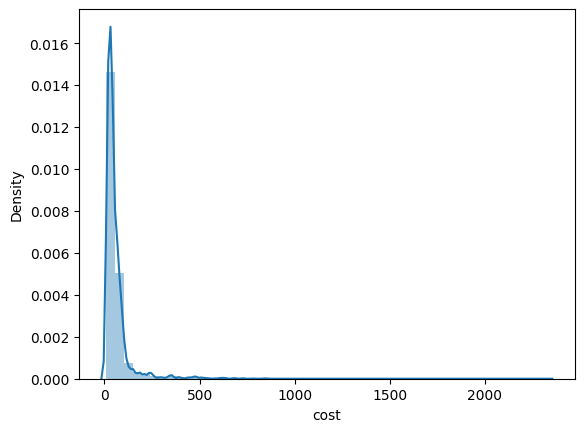

In [48]:
sns.distplot(data['cost'])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)